#### Country Clustering
<b>Objective</b> USe KMeans clustering and principle component analysis(PCA) to cluster countries development status based on features given in dataset. <br></br>

<b>About dataset</b> Features include 'child_mort': Death of children under 5 years of age per 1000 live births, 'exports': Exports of goods and services per capita. Given as %age of the GDP per capita, 'health': Total health spending per capita. Given as %age of GDP per capita, 'imports': Imports of goods and services per capita. Given as %age of the GDP per capita, 'income': Net income per person, 'inflation': The measurement of the annual growth rate of the Total GDP, 'life_expec': The average number of years a new born child would live if the current mortality patterns are to remain the same, 'total_fer': The number of children that would be born to each woman if the current age-fertility rates remain the same, 'gdpp': The GDP per capita. Calculated as the Total GDP divided by the total population. <br></br>

<b>Procedure</b> Load data and do exploratory data analysis to gain insights on the dataset. <br></br>
Preprocess the data and feed into KMeans algorithm. <br></br>
Analyze final outcome and come to conclusions

In [1]:
import pandas as pd

df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [2]:
print(df.isnull().sum())
df.shape

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


(167, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
df.country.duplicated().any()
   

False

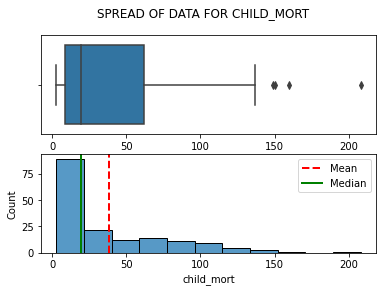

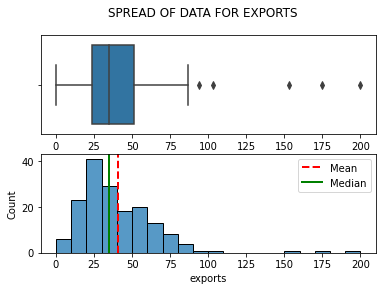

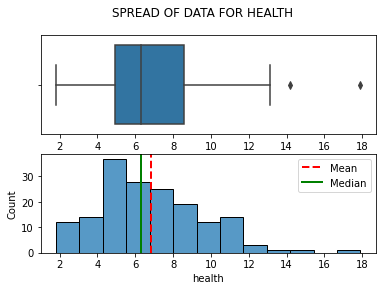

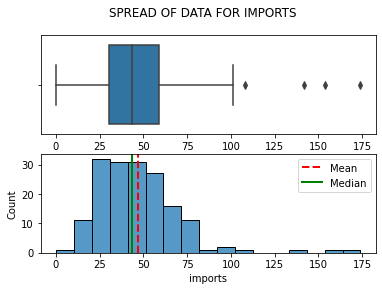

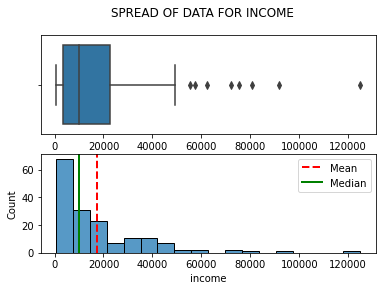

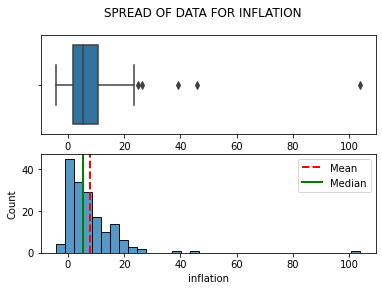

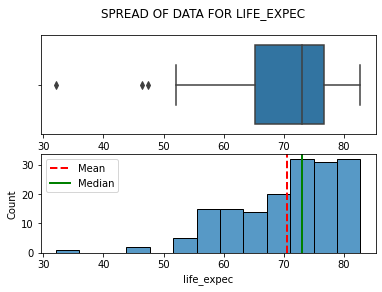

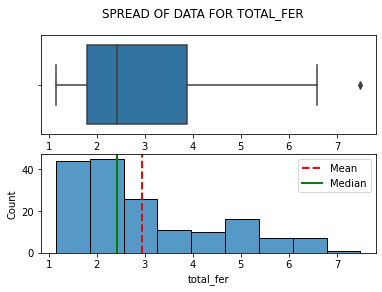

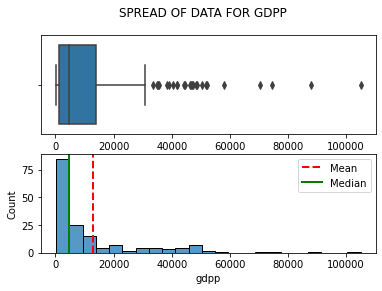

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 

numeric_data = df.drop('country', axis=1)

def box_hist_plots(data):
    Name=data.name.upper()
    mean=data.mean()
    median=data.median()
    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.suptitle("SPREAD OF DATA FOR " + Name)
    sns.boxplot(x=data, data=data, ax=ax1)
    sns.histplot(data, ax=ax2)
    ax2.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax2.axvline(median, color='g', linestyle='-',linewidth=2)
    plt.legend({'Mean': mean, 'Median': median})

numeric_columns = numeric_data.columns
for i in range(len(numeric_columns)):
    box_hist_plots(df[numeric_columns[i]])

All plots show right skewed data since the mean is to the right of the median except for life expectancy. Outliers are present if all plots.

C:\Users\sarmi\AppData\Local\Temp/ipykernel_25224/621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

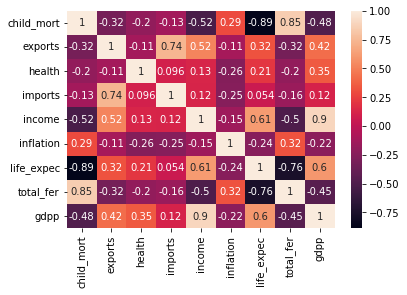

In [7]:
sns.heatmap(df.corr(), annot=True)

gdpp and income, total_fer and child_mort, and exports and imports are highly corelated. Child_mort and life_expec are highly negatively corelated.

In [8]:
# Handle high variance data before clustering and PCA
from sklearn.preprocessing import StandardScaler

df.drop('country', axis=1, inplace=True)

s = StandardScaler()
df_scaled = s.fit_transform(df)

In [9]:
# Transform df_scaled from numpy array to pd dataframe
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
print(df_scaled.mean().round())
print(df_scaled.std().round())

child_mort   -0.0
exports       0.0
health        0.0
imports       0.0
income       -0.0
inflation    -0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64
child_mort    1.0
exports       1.0
health        1.0
imports       1.0
income        1.0
inflation     1.0
life_expec    1.0
total_fer     1.0
gdpp          1.0
dtype: float64


In [10]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
scores = []
# find optimal number of clusters to use
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(df_scaled)
    inertia.append(kmeans.inertia_)
    predictions = kmeans.predict(df_scaled)
    scores.append(silhouette_score(df_scaled, predictions))

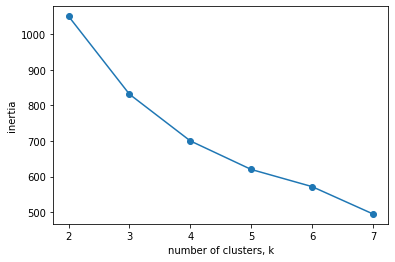

In [12]:
plt.plot(range(2,8), inertia, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

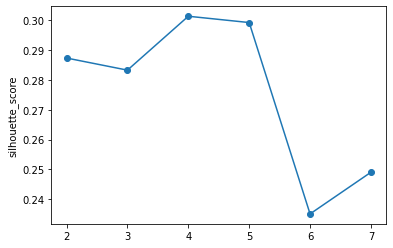

In [13]:
plt.plot(range(2, 8) , scores, '-o')
plt.ylabel('silhouette_score')
plt.show()

In [14]:
print(scores[2])

0.301375962376881


Optimal number of clusters is 3

In [15]:
kmeans= KMeans(n_clusters= 3, random_state=42)
kmeans.fit(df_scaled)
predictions= kmeans.predict(df_scaled)
df_scaled['clusters'] = predictions
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,2
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,2
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,2
...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,2
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,2
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,2
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,1


In [16]:
from sklearn.decomposition import PCA

pca= PCA(n_components=2)
df_pca= pca.fit_transform(df_scaled)

In [17]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
df_pca.shape

[0.43693833 0.1606209 ]


(167, 2)

In [18]:
df_final = pd.DataFrame(df_pca, columns=['pca_var1', 'pca_var2'])
df_final['cluster']= df_scaled['clusters']
df_final.head()


,pca_var1,pca_var2,cluster
0,-2.812891,0.205835,1
1,0.290463,-0.702677,2
2,-0.408510,-0.543375,2
3,-2.832817,1.792935,1
4,0.898448,0.034409,2


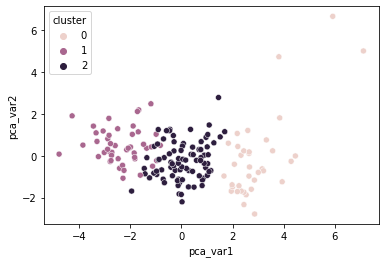

In [19]:
plt.figure()
ax = sns.scatterplot(x='pca_var1', y='pca_var2', hue='cluster', data=df_final)

In [20]:
df = pd.read_csv('Country-data.csv', usecols=['country'])
df_final['Country']= df['country']
df_final

,pca_var1,pca_var2,cluster,Country
0,-2.812891,0.205835,1,Afghanistan
1,0.290463,-0.702677,2,Albania
2,-0.408510,-0.543375,2,Algeria
3,-2.832817,1.792935,1,Angola
4,0.898448,0.034409,2,Antigua and Barbuda
...,...,...,...,...
162,-0.930765,0.565930,2,Vanuatu
163,-0.662525,-1.285962,2,Venezuela
164,0.358378,1.266029,2,Vietnam
165,-1.826207,-0.071344,1,Yemen


In [21]:
cluster_0= df_final.loc[df_final['cluster']==0]
cluster_0['Country'].unique()

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada',
       'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands',
       'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore',
       'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

In [22]:
cluster_1= df_final[df_final['cluster']==1]
cluster_1['Country'].unique()

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'], dtype=object)

In [23]:
cluster_2= df_final[df_final['cluster']==2]
cluster_2['Country'].unique()

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia',
       'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia',
       'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic',
       'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR',
       'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.',
       'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal',
       'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia',
       'Seychelles', 'Solomon Islands', 'Sri Lanka',
       'St. Vincent and the Grenadines'

#### Conclusion
Cluster 0 is for developed countries<br></br>
Cluster 1 is for poor countries that are still developing <br></br>
Cluster 2 is for developing countries<br></br>